In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
for dirname, _, filenames in os.walk("C:\\Users\\Abhishek kumar\\Documents\\Churn_Modelling.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data=pd.read_csv("C:\\Users\\Abhishek kumar\\Documents\\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.shape

(10000, 14)

In [9]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
data.duplicated().sum()

0

In [11]:
y=data[data['Exited']==1]

n=data[data['Exited']==0]

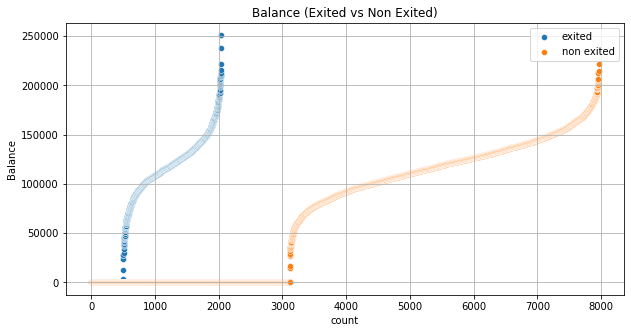

In [12]:
plt.figure(figsize=(10,5))
ybalance=list(y['Balance'])
sbalance=list(n["Balance"])

ybalance.sort()
sbalance.sort()

sns.scatterplot(ybalance,label="exited")
sns.scatterplot(sbalance,label="non exited")
plt.grid()
plt.title("Balance (Exited vs Non Exited)")
plt.ylabel("Balance")
plt.xlabel("count")
plt.show()

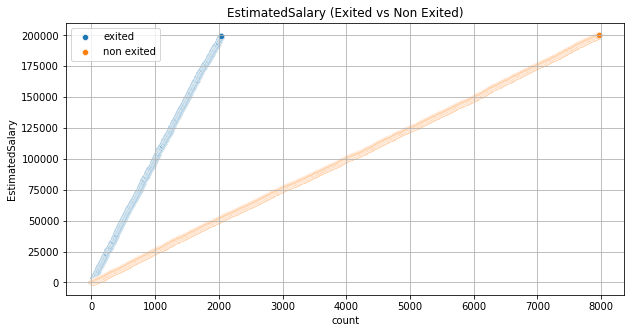

In [13]:
plt.figure(figsize=(10,5))
yEstimatedSalary=list(y['EstimatedSalary'])
sEstimatedSalary=list(n["EstimatedSalary"])

yEstimatedSalary.sort()
sEstimatedSalary.sort()

sns.scatterplot(yEstimatedSalary,label="exited")
sns.scatterplot(sEstimatedSalary,label="non exited")
plt.grid()
plt.title("EstimatedSalary (Exited vs Non Exited)")
plt.ylabel("EstimatedSalary")
plt.xlabel("count")
plt.show()

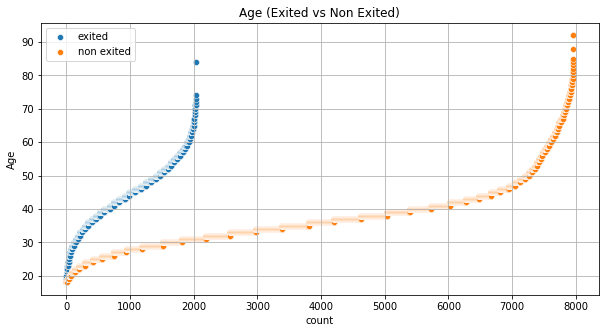

In [14]:
plt.figure(figsize=(10,5))
yage=list(y['Age'])
sage=list(n["Age"])

yage.sort()
sage.sort()

sns.scatterplot(yage,label="exited")
sns.scatterplot(sage,label="non exited")
plt.grid()
plt.title("Age (Exited vs Non Exited)")
plt.ylabel("Age")
plt.xlabel("count")
plt.show()

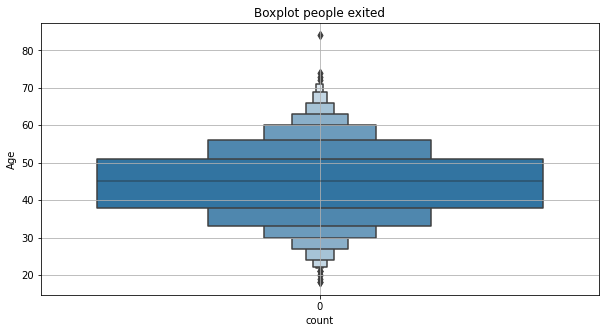

In [15]:
plt.figure(figsize=(10,5))
sns.boxenplot(y["Age"])
plt.grid()
plt.title("Boxplot people exited")
plt.ylabel("Age")
plt.xlabel("count")
plt.show()

In [16]:
gender=y['Gender'].value_counts()
value=list(y['Gender'].value_counts())
key=['famale','male']
print(key)

['famale', 'male']


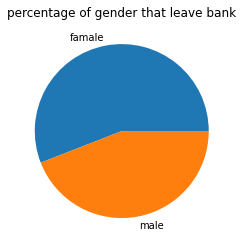

In [17]:
plt.pie(value,labels=key)
plt.title("percentage of gender that leave bank")
plt.show()

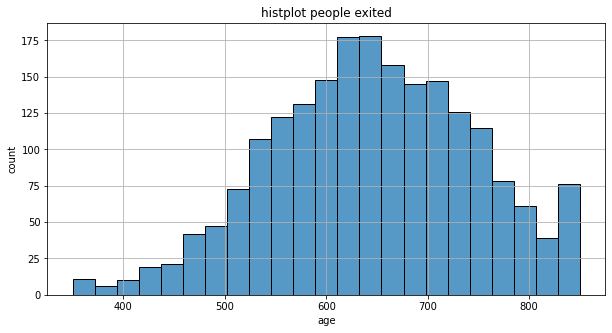

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(y["CreditScore"])
plt.grid()
plt.title("histplot people exited")
plt.ylabel("count")
plt.xlabel("age")
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])
        

In [20]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
from sklearn.model_selection import train_test_split
x=data.drop("Exited",axis=1)
y=data['Exited']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [23]:
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train=pd.DataFrame(model.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [24]:
x_train.shape

(7000, 10)

In [25]:
y_train.shape

(7000,)

In [26]:
from sklearn.linear_model import LogisticRegression

classifier7 = LogisticRegression()
classifier7.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred7 = classifier7.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[2305   68]
 [ 506  121]]


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

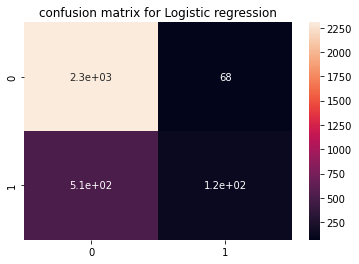

In [28]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [29]:
logreg=accuracy_score(y_test,y_pred7)
logreg

0.8086666666666666

In [30]:
roc_auc_score(y_test, y_pred7)

0.5821633730343557

In [31]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.64      0.19      0.30       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [32]:
##Support Vector Machine

In [33]:
from sklearn.svm import SVC
import warnings

warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, confusion_matrix

svc = SVC(random_state=101)

svc.fit(x_train,y_train)

SVC(random_state=101)

In [34]:
svc.score(x_test,y_test)

0.8556666666666667

In [35]:
y_pred7 = svc.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[2322   51]
 [ 382  245]]


Text(0.5, 1.0, 'confusion matrix for Support Vector Machine')

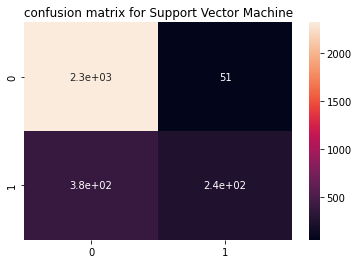

In [36]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Support Vector Machine")

In [37]:
##Decision tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier 


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7983333333333333


Text(0.5, 1.0, 'confusion matrix for Decision tree classifier')

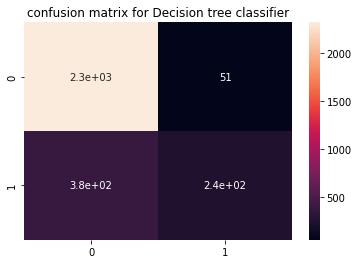

In [40]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Decision tree classifier")

In [41]:
##Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)


classifier_rf.score(x_test,y_test)

0.8576666666666667

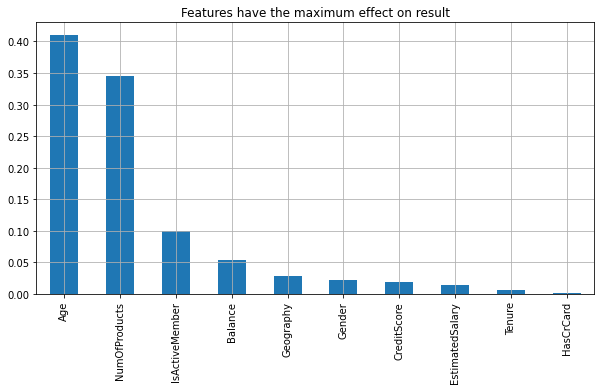

In [43]:
 #Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(classifier_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
# Plot a simple bar chart
feature_importances.plot.bar();
plt.grid()
plt.title("Features have the maximum effect on result")
plt.show()

In [44]:
imp_feature_data=data[['Age','NumOfProducts','IsActiveMember']]
x1_train,x1_test,y1_train,y1_test=train_test_split(imp_feature_data,data['Exited'],random_state=1,test_size=0.3)

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x1_train, y1_train)


classifier_rf.score(x1_test,y1_test)

0.855

In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(1,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model1=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model1.fit(x1_train,y1_train)

rf_hyper_model1.score(x1_test,y1_test)

0.8563333333333333

In [47]:
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(1,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model.fit(x_train,y_train)

y_pred = rf_hyper_model.predict(x_test)

rf_hyper_model.score(x_test,y_test)

0.8286666666666667

In [48]:
rf_hyper_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [10]})

In [49]:
y_pred = rf_hyper_model.predict(x_test)
rf_hyper_model.score(x_test,y_test)

0.8286666666666667

Text(0.5, 1.0, 'confusion matrix for random forest classifier')

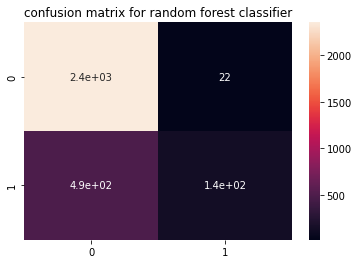

In [50]:
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for random forest classifier")

In [51]:
##KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

neigh.score(x_test,y_test)

0.819

In [53]:
y_pred = neigh.predict(x_test)
neigh.score(x_test,y_test)

0.819

Text(0.5, 1.0, 'confusion matrix for Kneighbour  classifier')

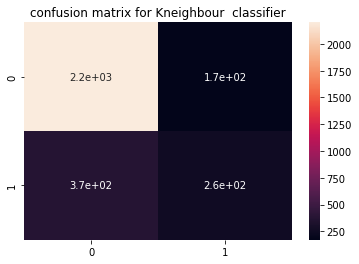

In [54]:
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Kneighbour  classifier")

In [55]:
##Gredient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.7983333333333333

In [57]:
y_pred = neigh.predict(x_test)
neigh.score(x_test,y_test)

0.819

Text(0.5, 1.0, 'confusion matrix for gradient boosting  classifier')

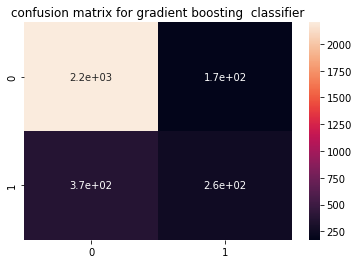

In [58]:
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boosting  classifier")